# **Projeto II**

- Faça a instalação das bibliotecas necessárias para tratamento de dados, sendo necessário usar pandas e numpy.
- Utilize a biblioteca Matplotlib ou Seaborn para construir novos gráficos.

In [5]:
# Importar bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Busque um dataset de sua preferência no [Kaggle]

In [6]:
# Leitura do arquivo : Relatório Mundial da Felicidade
df = pd.read_csv('World Happiness Report 2005-2021.csv')

- Fale sobre o motivo de escolha dos dados: pq esses dados me chamaram a atenção ao ponto de achar que teríamos bons insights? O que eu vi de relevante nesses dados?

```python
Além das habilidades técnicas, a análise do Relatório Mundial da Felicidade nos lembra da importância de considerar o bem-estar emocional e mental em nossas vidas. Em tempos desafiadores, compreender o que contribui para a felicidade pode nos ajudar a enfrentar incertezas com mais resiliência. Afinal, a busca pela felicidade é um objetivo universal que transcende fronteiras e culturas. 
```


**Realizando uma Análise  exploratória dos dados**

In [7]:
# Verificando o carregamento do arquivo e visualizando algumas linhas
df.head(3)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357


In [8]:
# Verificando quantidade de linhas e colunas
df.shape

(2089, 12)

In [9]:
#Contando nulos por colunas e por linhas
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2084    0
2085    0
2086    0
2087    0
2088    0
Length: 2089, dtype: int64


In [10]:
# Vizualizando a  descriçao dos dados
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,2065.000000,2073.000000,1873.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474,0.651421,0.270544,0.483914
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136,0.105954,0.085849,0.191515
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840,0.570057,0.207652,0.334808
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339,0.662837,0.260328,0.467046
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789,0.737176,0.321706,0.616302
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590,0.993604


In [11]:
# Verificando informaçoes
info_df = df.info
print(info_df)

<bound method DataFrame.info of      Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.302574        0.450662   
1     Afghanistan  2009     4.401778            7.472446        0.552308   
2     Afghanistan  2010     4.758381            7.579183        0.539075   
3     Afghanistan  2011     3.831719            7.552006        0.521104   
4     Afghanistan  2012     3.782938            7.637953        0.520637   
...           ...   ...          ...                 ...             ...   
2084     Zimbabwe  2017     3.638300            8.241609        0.754147   
2085     Zimbabwe  2018     3.616480            8.274620        0.775388   
2086     Zimbabwe  2019     2.693523            8.196998        0.759162   
2087     Zimbabwe  2020     3.159802            8.117733        0.717243   
2088     Zimbabwe  2021     3.154578            8.153248        0.685151   

      Healthy life expectancy at birth  Freedom to make

In [12]:
# Removendo linhas duplicadas e verificando se houveram alteraçoes
df = df.drop_duplicates()
df.shape

(2089, 12)

In [14]:
# Renomeando as colunas
df.rename(columns={
    'Country name': 'Nome do País',
    'Year': 'Ano', 
    'Life Ladder': 'Escala de Felicidade',
    'Log GDP per capita': 'Log do PIB per capita',
    'Social support': 'Apoio Social', 
    'Healthy life expectancy at birth': 'Expectativa de Vida Saudável ao Nascer', 
    'Freedom to make life choices': 'Liberdade para Tomar Decisões na Vida',
    'Generosity': 'Generosidade',
    'Perceptions of corruption': 'Percepções de Corrupção', 
    'Positive affect': 'Afeto Positivo',
    'Negative affect': 'Afeto Negativo',
    'Confidence in national government': 'Confiança no Governo Nacional'
}, inplace=True)

df.columns


Index(['Nome do País', 'Ano', 'Escala de Felicidade', 'Log do PIB per capita',
       'Apoio Social', 'Expectativa de Vida Saudável ao Nascer',
       'Liberdade para Tomar Decisões na Vida', 'Generosidade',
       'Percepções de Corrupção', 'Afeto Positivo', 'Afeto Negativo',
       'Confiança no Governo Nacional'],
      dtype='object')

In [91]:
# Salvando novo csv traduzido
df.to_csv('Relatorio_Mundial_da_Felicidade.csv', index=False)

**Analise dos dados**

- Crie visualizações de gráficos com pandas, sendo no mínimo 4 gráficos

 1. Qual é a distribuição dos países na escala de felicidade?

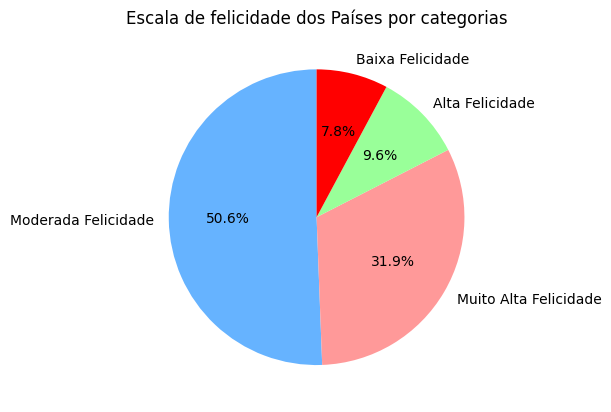

In [15]:
# Função para categorizar a felicidade
def categorizar_felicidade(valor):
    if 1 <= valor <= 4:
        return 'Baixa Felicidade'
    elif 5 <= valor <= 7:
        return 'Moderada Felicidade'
    elif 7 <= valor <= 9:
        return 'Alta Felicidade'
    else:
        return 'Muito Alta Felicidade'

# Calculando a média da Escala de Felicidade para cada país ao longo dos anos
media_felicidade = df.groupby('Nome do País')['Escala de Felicidade'].mean().reset_index()

# Aplicando a função de categorização
media_felicidade['Categoria de Felicidade'] = media_felicidade['Escala de Felicidade'].apply(categorizar_felicidade)

# Contando o número de países em cada categoria
categoria_de_felicidade = media_felicidade['Categoria de Felicidade'].value_counts()

# Plotando o gráfico de pizza
categoria_de_felicidade.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99','red'])
plt.title('Escala de felicidade dos Países por categorias')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

2) Quais são os 3 países com a maior e a menor média de felicidade ao longo dos anos?

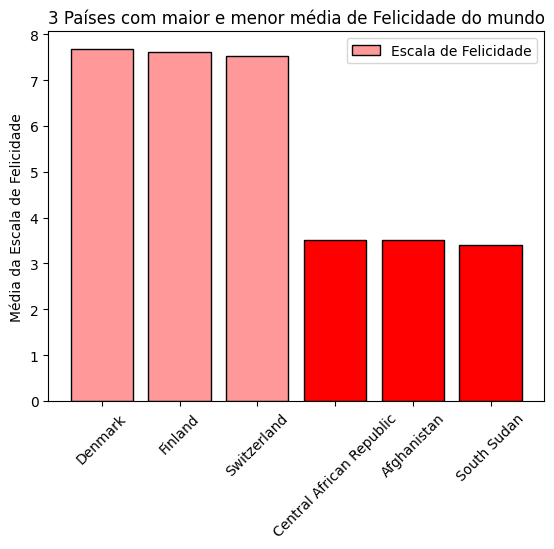

In [16]:

# Calculando a média da Escala de Felicidade para cada país ao longo dos anos
media_felicidade = df.groupby('Nome do País')['Escala de Felicidade'].mean().reset_index()

# Ordenando os países pela média da Escala de Felicidade
paises_ordenados = media_felicidade.sort_values(by='Escala de Felicidade', ascending=False)

# Pegando os 3 países com a maior e menor média de felicidade
top_3_paises = paises_ordenados.head(3)
bottom_3_paises = paises_ordenados.tail(3)

# Combinando os dados
paises_para_plotar = pd.concat([top_3_paises, bottom_3_paises])

# Plotando o gráfico
plt.bar(paises_para_plotar['Nome do País'], paises_para_plotar['Escala de Felicidade'], color=['#ff9999']*3 + ['red']*3, edgecolor='black')
plt.ylabel('Média da Escala de Felicidade')
plt.title('3 Países com maior e menor média de Felicidade do mundo')
plt.xticks(rotation=45)
plt.legend(['Escala de Felicidade'])
plt.show()


4. Qual é a escala de felicidade do Brasil em relação ao país com a maior média e ao país com a menor média de felicidade mundial?

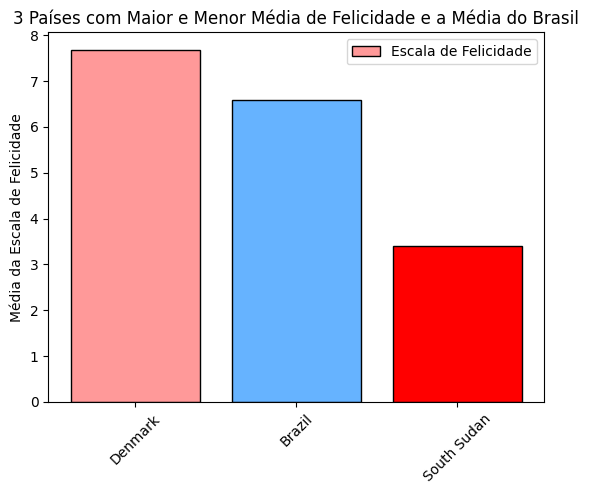

In [17]:
# Ordenando os países pela média da Escala de Felicidade
paises_ordenados = media_felicidade.sort_values(by='Escala de Felicidade', ascending=False)

# Pegando o país com a maior e menor média de felicidade
pais_maior_media = paises_ordenados.head(1)
pais_menor_media = paises_ordenados.tail(1)

# Incluindo o Brasil na análise
brasil = media_felicidade[media_felicidade['Nome do País'] == 'Brazil']

# Combinando os dados
paises_para_plotar = pd.concat([pais_maior_media, brasil, pais_menor_media ])

# Plotando o gráfico

plt.bar(paises_para_plotar['Nome do País'], paises_para_plotar['Escala de Felicidade'], color=['#ff9999'] + ['#66b3ff'] + ['red'], edgecolor='black')
plt.ylabel('Média da Escala de Felicidade')
plt.title('3 Países com Maior e Menor Média de Felicidade e a Média do Brasil')
plt.xticks(rotation=45)
plt.legend(['Escala de Felicidade'])
plt.show()


4. Como a escala de felicidade do Brasil variou ao longo do tempo? ?

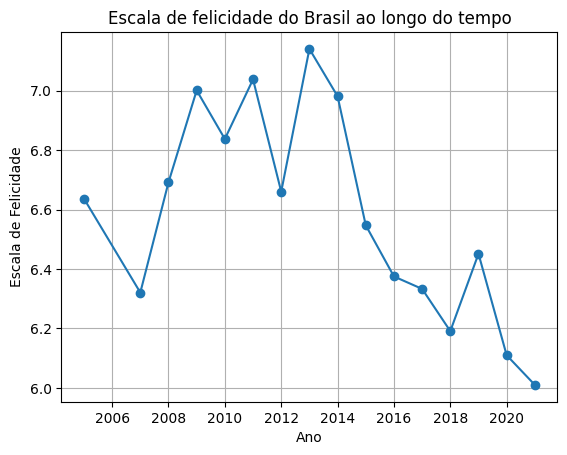

In [18]:

# Filtrando os dados do Brasil
dados_brasil = df[df['Nome do País'] == 'Brazil']

# Para verificar a distribuição ao longo dos anos, você pode fazer uma visualização adicional
# Plotando a Escala de Felicidade ao longo dos anos

plt.plot(dados_brasil['Ano'], dados_brasil['Escala de Felicidade'], marker='o')
plt.xlabel("Ano")
plt.ylabel("Escala de Felicidade")
plt.title("Escala de felicidade do Brasil ao longo do tempo")
plt.grid(True)
plt.show()

- Teste de hipoteses

In [19]:
from scipy.stats import ttest_ind

**5. Países com maior afeto positivo são mais generosos do que países com menor afeto positivo?**
- Hipótese Nula (H0): A média de generosidade para países com alto afeto positivo é igual à média de generosidade para países com baixo afeto positivo.
- Hipótese Alternativa (H1): A média de generosidade para países com alto afeto positivo é diferente da média de generosidade para países com baixo afeto positivo.

Estatística T: 12.594682384782182
Valor P: 4.725440853653383e-35


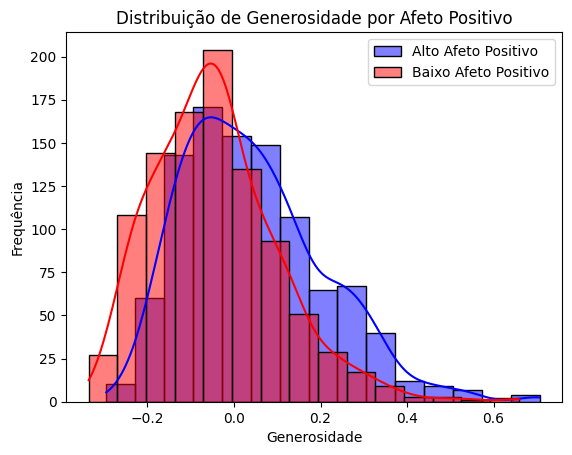

Rejeitamos a hipótese nula: A média de generosidade para países com alto afeto positivo é diferente da média de generosidade para países com baixo afeto positivo.


In [20]:

# Calculando a mediana de Afeto Positivo
mediana_afeto = df['Afeto Positivo'].median()

# Amostras dos grupos de países com base na mediana de Afeto Positivo
grupo_mais_afeto = df[df['Afeto Positivo'] > mediana_afeto]
grupo_menos_afeto = df[df['Afeto Positivo'] <= mediana_afeto]

# Teste t para Generosidade entre os dois grupos
estatistica_t, valor_p = ttest_ind(grupo_mais_afeto['Generosidade'].dropna(), grupo_menos_afeto['Generosidade'].dropna())

print(f"Estatística T: {estatistica_t}")
print(f"Valor P: {valor_p}")

# Plotando o gráfico de distribuições de Generosidade para os dois grupos
sns.histplot(grupo_mais_afeto['Generosidade'].dropna(), color='blue', label='Alto Afeto Positivo', kde=True, bins=15)
sns.histplot(grupo_menos_afeto['Generosidade'].dropna(), color='red', label='Baixo Afeto Positivo', kde=True, bins=15)
plt.xlabel("Generosidade")
plt.ylabel("Frequência")
plt.title("Distribuição de Generosidade por Afeto Positivo")
plt.legend()
plt.show()

# Interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula: A média de generosidade para países com alto afeto positivo é diferente da média de generosidade para países com baixo afeto positivo.")
else:
    print("Não rejeitamos a hipótese nula: A média de generosidade para países com alto afeto positivo não é significativamente diferente da média de generosidade para países com baixo afeto positivo.")


    

**6. Países com maior liberdade para tomar decisões na vida têm um apoio social maior do que países com menor liberdade?**
- Hipótese Nula (H0): A média de apoio social para países com alta liberdade para tomar decisões é igual à média de apoio social para países com baixa liberdade.
- Hipótese Alternativa (H1): A média de apoio social para países com alta liberdade para tomar decisões é diferente da média de apoio social para países com baixa liberdade.

Estatística T: 15.850461828031246
Valor P: 1.8422839707972012e-53


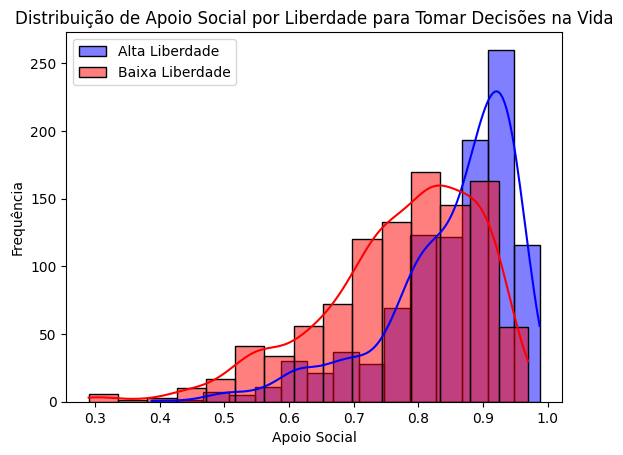

Rejeitamos a hipótese nula: A média de apoio social para países com alta liberdade para tomar decisões é diferente da média para países com baixa liberdade.


In [21]:
# Calculando a mediana de Liberdade para Tomar Decisões na Vida
mediana_liberdade = df['Liberdade para Tomar Decisões na Vida'].median()

# Amostras dos grupos de países com base na mediana de Liberdade para Tomar Decisões na Vida
grupo_mais_liberdade = df[df['Liberdade para Tomar Decisões na Vida'] > mediana_liberdade]
grupo_menos_liberdade = df[df['Liberdade para Tomar Decisões na Vida'] <= mediana_liberdade]

# Teste t para Apoio Social entre os dois grupos
estatistica_t, valor_p = ttest_ind(grupo_mais_liberdade['Apoio Social'].dropna(), grupo_menos_liberdade['Apoio Social'].dropna())

print(f"Estatística T: {estatistica_t}")
print(f"Valor P: {valor_p}")

# Plotando o gráfico de distribuições de Apoio Social para os dois grupos
sns.histplot(grupo_mais_liberdade['Apoio Social'].dropna(), color='blue', label='Alta Liberdade', kde=True, bins=15)
sns.histplot(grupo_menos_liberdade['Apoio Social'].dropna(), color='red', label='Baixa Liberdade', kde=True, bins=15)
plt.xlabel("Apoio Social")
plt.ylabel("Frequência")
plt.title("Distribuição de Apoio Social por Liberdade para Tomar Decisões na Vida")
plt.legend()
plt.show()

# Interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula: A média de apoio social para países com alta liberdade para tomar decisões é diferente da média para países com baixa liberdade.")
else:
    print("Não rejeitamos a hipótese nula: A média de apoio social para países com alta liberdade para tomar decisões não é significativamente diferente da média para países com baixa liberdade.")



- Faça  consultas em sql

In [22]:
import sqlite3

7. Qual o número de países por ano?

In [30]:
# Criando uma conexão com um banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')

# Escrevendo o DataFrame em uma tabela SQL
df.to_sql('Relatorio_Mundial_da_Felicidade', conn, index=False, if_exists='replace')

# Consultando SQL 
query_sql = """
SELECT 
    "Ano", 
    COUNT(DISTINCT "nome_do_país") AS numero_de_paises
FROM 
    Relatorio_Mundial_da_Felicidade
GROUP BY 
    "Ano"
ORDER BY 
    "Ano";
"""
# Consultando os resultados em um DataFrame
contagem_paises_por_ano = pd.read_sql_query(query_sql, conn)

# Imprimindo os resultado
print(contagem_paises_por_ano)

# Fechando a conexão
conn.close()

     Ano  numero_de_paises
0   2005                 1
1   2006                 1
2   2007                 1
3   2008                 1
4   2009                 1
5   2010                 1
6   2011                 1
7   2012                 1
8   2013                 1
9   2014                 1
10  2015                 1
11  2016                 1
12  2017                 1
13  2018                 1
14  2019                 1
15  2020                 1
16  2021                 1


In [29]:
# Versao que aprofessora mepassou no slack
#  Criando uma conexão com um banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')
# Escrevendo o DataFrame em uma tabela SQL
df.to_sql('Relatorio_Mundial_da_Felicidade', conn, index=False, if_exists='replace')
# Consultando SQL para contar a quantidade de anos distintos
query_sql = """
SELECT "Ano", COUNT(DISTINCT "nome_do_país") AS numero_de_paises
FROM Relatorio_Mundial_da_Felicidade
GROUP BY  "Ano"
ORDER BY "Ano";
"""

# Consultando os resultados em um DataFrame
contagem_anos = pd.read_sql_query(query_sql, conn)
# Imprimindo o resultado
print(contagem_anos)
# Fechando a conexão
conn.close()

     Ano  numero_de_paises
0   2005                 1
1   2006                 1
2   2007                 1
3   2008                 1
4   2009                 1
5   2010                 1
6   2011                 1
7   2012                 1
8   2013                 1
9   2014                 1
10  2015                 1
11  2016                 1
12  2017                 1
13  2018                 1
14  2019                 1
15  2020                 1
16  2021                 1
